In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

%matplotlib inline

In [5]:
df = pd.read_csv("/Users/asmitabaul/Desktop/heart_disease_uci.csv")

df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [47]:
#Check for missing values
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [13]:
# Fill numerical columns with median
num_cols = ['trestbps', 'thalch', 'oldpeak', 'ca']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
cat_cols = ['restecg', 'exang', 'slope', 'thal', 'fbs']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0]).astype(df[col].dtype)



In [14]:
# Verify no missing values remain
df.isnull().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [48]:
# Basic Statistical Summary
df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [49]:
# Check class balance
df['num'].value_counts()


num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

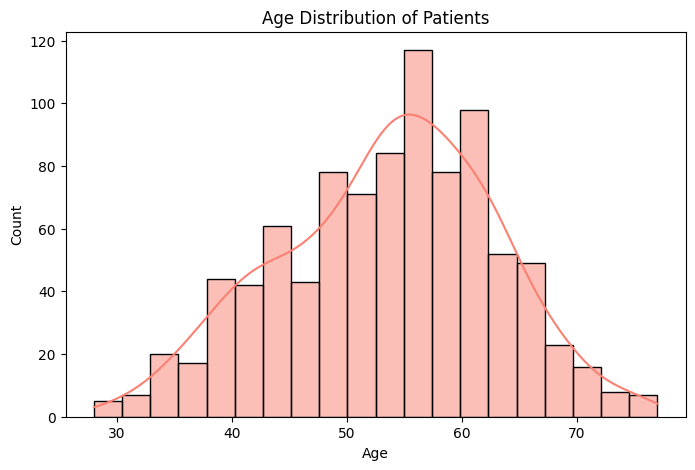

In [51]:
# Univariate Analysis
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


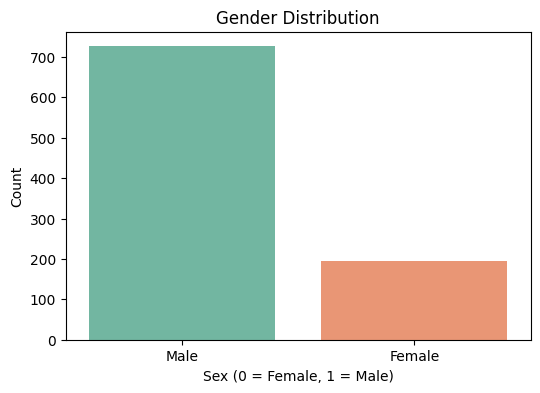

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, hue= 'sex', palette='Set2', legend=False) 
plt.title('Gender Distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

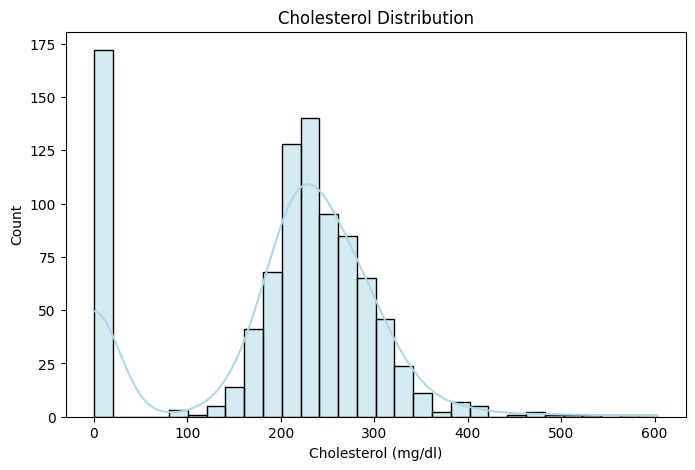

In [53]:
# Cholesterol Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['chol'], bins=30, color='lightblue', kde=True)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')
plt.show()

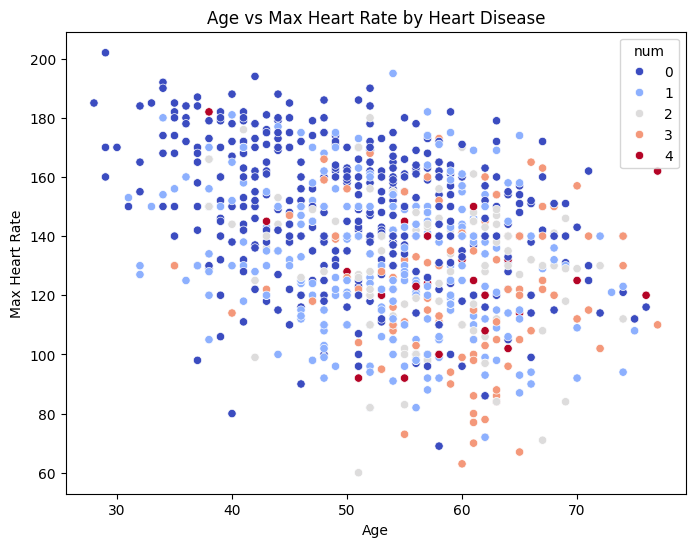

In [54]:
# Bivariate Analysis
# Relationship between Age and Maximum Heart Rate
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='thalch', hue='num', data=df, palette='coolwarm')
plt.title('Age vs Max Heart Rate by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

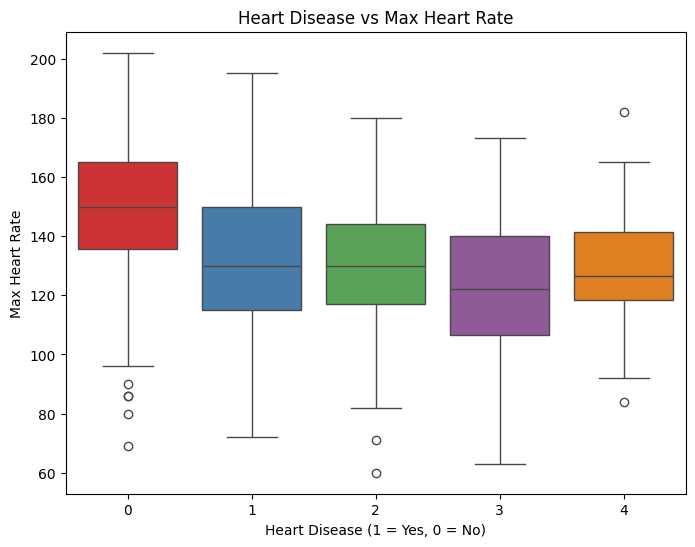

In [55]:
# Boxplot for Max Heart Rate by Target
plt.figure(figsize=(8,6))
sns.boxplot(x='num', y='thalch', data=df, hue= 'num', palette='Set1', legend=False)
plt.title('Heart Disease vs Max Heart Rate')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Max Heart Rate')
plt.show()

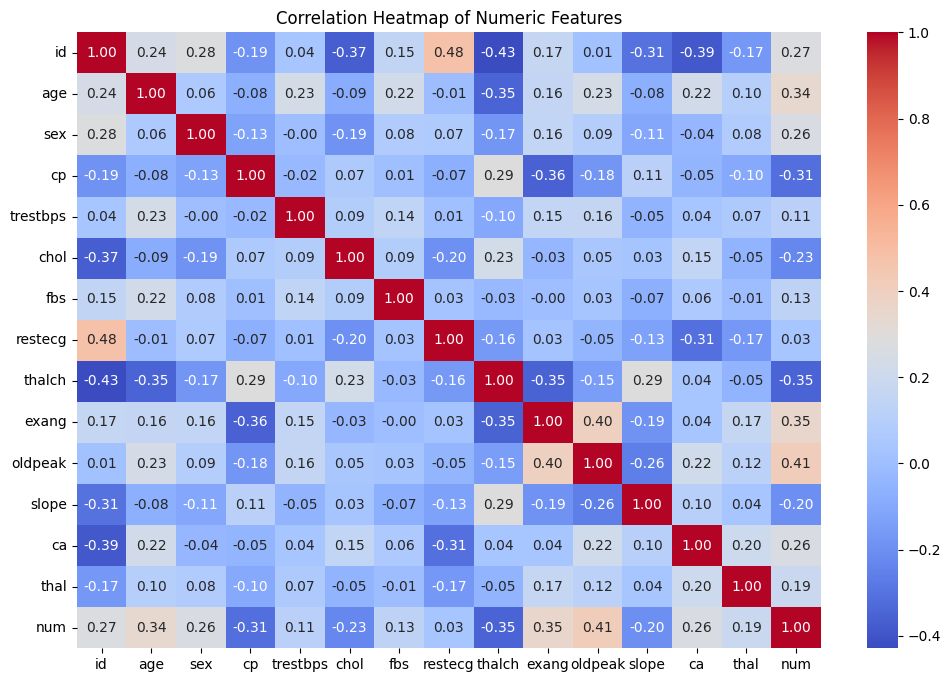

In [56]:
# Encode categorical variables
df_encoded = df.copy()
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Select only numeric columns for correlation
numeric_cols = df_encoded.select_dtypes(include=np.number)

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [58]:
# Interactive Visualizations with Plotly
fig = px.scatter(df, x='age', y='thalch', color='num',
                 title="Interactive Age vs Max Heart Rate",
                 labels={'thalch':'Max Heart Rate', 'age':'Age'},
                 hover_data=['sex','chol'])
fig.show()

In [59]:
# Interactive histogram with dropdown for variable selection
fig = px.histogram(df, x='chol', color='num', barmode='overlay',
                   title='Cholesterol Distribution by Heart Disease',
                   labels={'chol':'Cholesterol (mg/dl)'})
fig.show()